# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Uliana 2593
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#all  necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading the datasets
train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

In [3]:
# Displaying the first 5 rows of the train and test sets
print("Training Data (first 5 rows):")
print(train_df.head())
print("\nTest Data (first 5 rows):")
print(test_df.head())

Training Data (first 5 rows):
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines 

In [4]:
# Exploratory Data Analysis 
# Displaying basic statistics

# table 1 - correlation table (train)print("\nTrain Set Statistics:")
train_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [5]:
# correlation table (test)
print("\nTest Set Statistics:")
test_df.corr()


Test Set Statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,-0.006626,-0.009440,-0.266216,0.162404,0.372485,0.206871,-0.390548,0.133561,0.569408,-0.254511,0.099016,0.561272,-0.283932
malic_acid,-0.006626,1.000000,0.041595,0.301608,-0.271036,-0.378490,-0.484559,0.277575,-0.357897,0.240793,-0.598088,-0.510999,-0.358937,0.593195
ash,-0.009440,0.041595,1.000000,0.537590,-0.053404,-0.030278,-0.113330,0.334431,-0.218353,0.218495,-0.106514,-0.164687,-0.034808,0.220407
alcalinity_of_ash,-0.266216,0.301608,0.537590,1.000000,-0.321763,-0.343779,-0.436390,0.527549,-0.183354,0.135088,-0.330198,-0.335409,-0.539902,0.576199
magnesium,0.162404,-0.271036,-0.053404,-0.321763,1.000000,0.235138,0.237704,-0.329042,0.491156,0.077021,0.147365,0.100646,0.420903,-0.188566
total_phenols,0.372485,-0.378490,-0.030278,-0.343779,0.235138,1.000000,0.839984,-0.592684,0.644847,0.001137,0.416623,0.612658,0.561005,-0.691855
flavanoids,0.206871,-0.484559,-0.113330,-0.436390,0.237704,0.839984,1.000000,-0.629779,0.630279,-0.306732,0.602698,0.805445,0.532763,-0.886365
nonflavanoid_phenols,-0.390548,0.277575,0.334431,0.527549,-0.329042,-0.592684,-0.629779,1.000000,-0.468201,0.055991,-0.194452,-0.583933,-0.687098,0.630578
proanthocyanins,0.133561,-0.357897,-0.218353,-0.183354,0.491156,0.644847,0.630279,-0.468201,1.000000,-0.025266,0.316147,0.496214,0.284267,-0.400272
color_intensity,0.569408,0.240793,0.218495,0.135088,0.077021,0.001137,-0.306732,0.055991,-0.025266,1.000000,-0.619902,-0.470412,0.199383,0.362468


In [6]:
# basic statistics(train)
print("Train Set Statistics:")
print(train_df.describe())

Train Set Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.540

In [7]:
#basic statistics (test)
print("Test Set Statistics:")
print(test_df.describe())

Test Set Statistics:
         alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  36.000000   36.000000  36.000000          36.000000   36.000000   
mean   13.013889    2.488611   2.385556          19.791667   98.944444   
std     0.904962    1.210778   0.238716           3.308550   16.626905   
min    11.030000    0.990000   1.950000          14.000000   70.000000   
25%    12.320000    1.670000   2.207500          16.950000   89.000000   
50%    13.110000    1.900000   2.310000          20.000000   96.000000   
75%    13.757500    3.202500   2.560000          22.000000  102.250000   
max    14.830000    5.800000   2.920000          28.500000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      36.000000   36.000000             36.000000        36.000000   
mean        2.212778    1.893889              0.421667         1.705278   
std         0.569845    0.974970              0.134302         0.678846   
min         

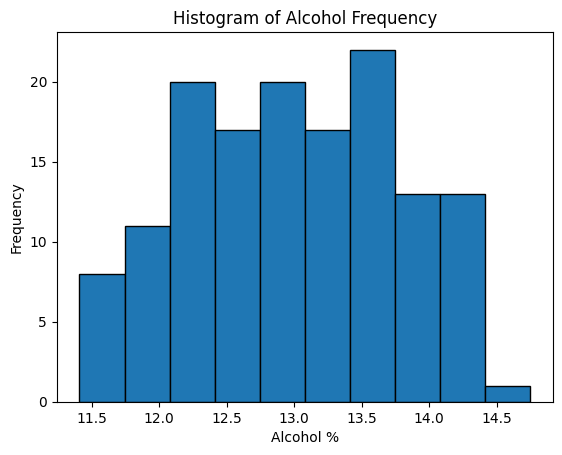

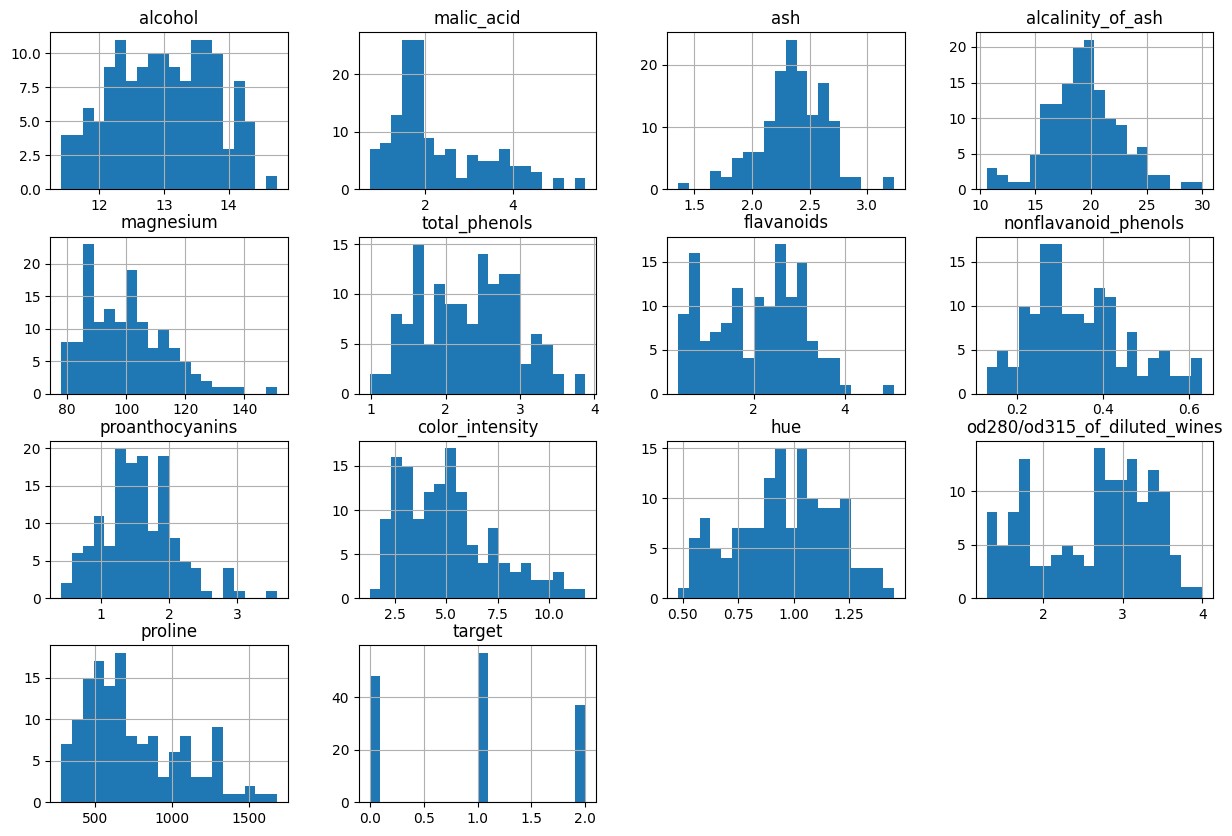

In [8]:
#Visualization 1: alcohol frequency histogram (train)

plt.hist(train_df.alcohol, bins=10, edgecolor='black')
plt.title('Histogram of Alcohol Frequency')
plt.xlabel('Alcohol %')
plt.ylabel('Frequency')
plt.show()

#Visualization2: Histograms of numerical variables(train)
train_df.hist(bins=20, figsize=(15, 10))
plt.title('Histograms of Numerical Variables in the Train Set')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

# Splitting data into features and target column
# X contains all features (excluding 'target'), y is the target column
X = train_df.drop(columns=['target'])
y = train_df['target']

# Splitting data into training and validation sets
# 80% of the data is used for training, and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
# Scaling the data is important for models like KNeighborsClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Defining the models for experimentation
# We are using three models: RandomForest, DecisionTree, and KNeighbors
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier()
}

# Defining the parameter grid for each model
# Each model will be tested with different parameters using GridSearchCV
param_grid = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]},
    'DecisionTree': {'max_depth': [3, 5, None], 'min_samples_split': [2, 10]},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
}

# Initializing variables to store the best results
# best_model will store the name of the best model, best_params will store the best parameters, 
# and best_score and best_f1 will store the scores
best_model = None
best_score = 0
best_params = {}
best_f1 = 0

# Creating a DataFrame to store results of each experiment
df_scoring = pd.DataFrame(columns=['model', 'params', 'best_score', 'f1'])

# Looping over each model and applying GridSearchCV
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train_scaled, y_train) # Training the model with the parameter grid
    
    y_pred = grid_search.predict(X_val_scaled) # Making predictions on the validation set
    f1 = metrics.f1_score(y_val, y_pred, average='macro')   # Calculating the F1 score for each result
    
    # Filling the DataFrame with results for the current model
    df_scoring.loc[len(df_scoring)] = [model_name, grid_search.best_params_, grid_search.best_score_, f1]
    
   # Updating the best model based on F1 and accuracy
    if grid_search.best_score_ > best_score and f1 >= best_f1:
        best_f1 = f1
        best_score = grid_search.best_score_
        best_model = model_name
        best_params = grid_search.best_params_

# Displaying all experiment results
print(df_scoring)

# Displaying the best model and its parameters
print("\nBest Model:", best_model)
print("Best Parameters:", best_params)


          model                                            params  best_score  \
0  RandomForest           {'max_depth': None, 'n_estimators': 50}    0.974703   
1  DecisionTree          {'max_depth': 3, 'min_samples_split': 2}    0.851320   
2    KNeighbors  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}    0.975044   

         f1  
0  0.969123  
1  0.969123  
2  1.000000  

Best Model: KNeighbors
Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [10]:
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score

# Re-standardizing the data (if needed, otherwise use the same scaled data from Part 3)
# Fitting the scaler again to the training data and transforming the validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Training the best model found in Part 3 with the best hyperparameters
# If the best model is RandomForest, we use the parameters stored in best_params
if best_model == 'RandomForest':
    final_model = RandomForestClassifier(**best_params)  # Unpacking best_params into RandomForestClassifier
elif best_model == 'DecisionTree':
    final_model = DecisionTreeClassifier(**best_params)  # Unpacking best_params into DecisionTreeClassifier
elif best_model == 'KNeighbors':
    final_model = KNeighborsClassifier(**best_params) # Unpacking best_params into KNeighborsClassifier

# Training the model on the scaled training data
# fit() method adjusts the model to the training data
final_model.fit(X_train_scaled, y_train)

# Evaluating the model's performance on the validation set
# The model makes predictions on the scaled validation data using predict()
y_val_pred = final_model.predict(X_val_scaled)

# Printing the classification report for the validation set
# The classification report shows precision, recall, f1-score, and support for each class
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))
print("Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred))

# Additional step: training the model on the full training set to prepare it for final predictions
# The final model is trained again on the full training set for more robust final predictions
final_model_full = final_model
final_model_full.fit(X_train_scaled, y_train) # Refitting the model on the entire training set


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Accuracy on Validation Set: 1.0


KNeighborsClassifier(p=1)

## Part 5 - Apply on test and show model performance estimation


f1-score on Test Set: 0.92

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        11

    accuracy                           0.92        36
   macro avg       0.93      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



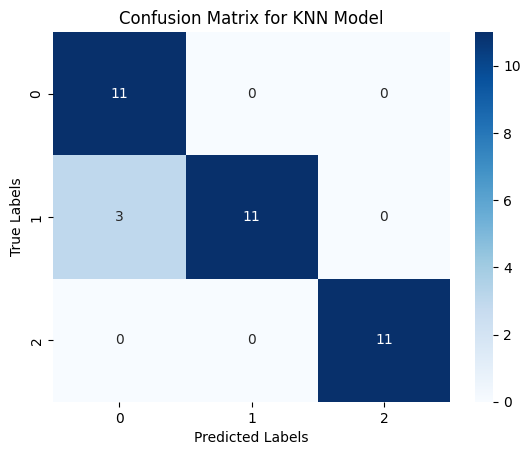

Prediction: 2, Actual: 2
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#  Data Preparation (Splitting the dataset into training and validation sets)
X = test_df.drop(columns=['target'])
y = test_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#  Model Training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn_model.fit(X_train_scaled, y_train)

#Testing the Model on the Test Data
X_test = test_df.drop(columns=['target'])
y_test = test_df['target']
X_test_scaled = scaler.transform(X_test)

#  Selecting the best model for testing (here we use KNN, but other models can be used)
best_model = knn_model

#  Making Predictions on the test set
y_pred = best_model.predict(X_test_scaled)

#Evaluating the F1 Score on the Test Set
f1_test = metrics.f1_score(y_test, y_pred, average='macro')
print(f"\nf1-score on Test Set: {f1_test:.2f}")

# Classification Report
print("\nClassification Report on Test Set:")
print(metrics.classification_report(y_test, y_pred))

# Confusion Matrix Visualization
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix for KNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Displaying several predictions with their actual values
for i in range(5):  #  Show the first 5 predictions
    print(f"Prediction: {y_pred[i]}, Actual: {y_test.iloc[i]}")
